In [429]:
import numpy as np
import matplotlib.pyplot as plt
# Define the function g(tau)
def g(tau, t):
    return (1 + np.cos(2 * np.pi * tau / t)) / 2

# Define the Gaussian function with the normalization factor
def gaussian(x, tau, epsilon, t):
    # Compute g(tau)
    g_tau = g(tau, t)
    # Compute the Gaussian expression with the normalization factor
    return (1 / np.sqrt(2 * np.pi * epsilon**2)) * np.exp(-((x - g_tau)**2) / (2 * epsilon**2))

# Example usage
x = 0.5    # Example value of x
time_steps = 10000000
tau = np.linspace(0,1,time_steps)    # Example value of tau
epsilon = 0.1 # Small value for epsilon
t = 1.0      # Example value for t

# Compute the Gaussian function
result = gaussian(x, tau, epsilon, t).sum()
print(result / time_steps)
#plt.plot(result)
#plt.show()

0.6507647602638593


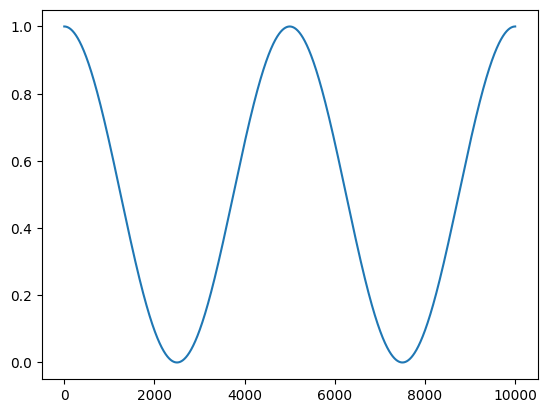

[0.5        0.49999961 0.49999842 ... 0.49999842 0.49999961 0.5       ]
2


In [430]:
import torch
def g(tau, t):
    return (1 + np.cos(4 * np.pi * tau / t)) / 2

def compute_Ct(x, X, eps=1e-3):
    """
        Args:
        - x (torch.Tensor): A tensor representing a batch of reference points (num_x, in_dim).
        - X (torch.Tensor): Matrix of shape (num_timesteps, N_Agents, in_dim).
    """
    distance = torch.linalg.vector_norm(X.unsqueeze(0) - x.unsqueeze(1).unsqueeze(1).unsqueeze(1), dim=4, ord = float('inf'))  # Broadcasting over x
    print(distance.shape)
    Ct_approx = (torch.clamp(eps - distance, min=0) * (3 / eps)).sum(dim=(2, 3))
    Ct_true = (distance < eps).float().sum(dim=(2, 3))
    return Ct_true, Ct_approx

time_steps = 10000
tau = np.linspace(0,1,time_steps)
#X = torch.tensor(g(tau, 1)).unsqueeze(1).unsqueeze(1) ### g(tau)
#x = torch.tensor([[0.5]])
#print(compute_Ct(x,X)[0])
plt.plot(g(tau,1))
plt.show()
print(g(tau, 1) - 0.5)
print((np.abs(g(tau, 1) - 0.5) < 1e-4).sum())

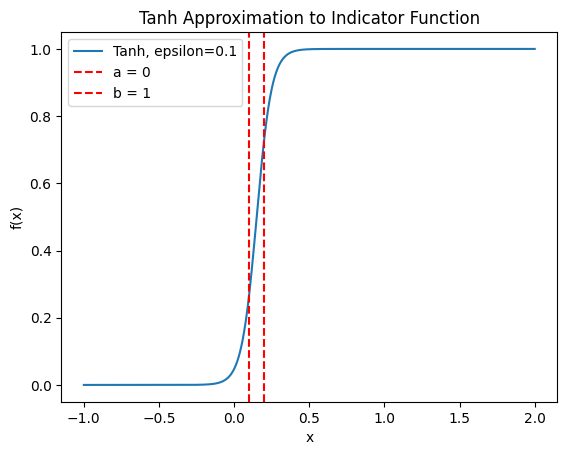

In [431]:
def tanh_approx(x, a, b, epsilon):
    return 0.5 * (1 + np.tanh((x - (a + b) / 2) / epsilon))
a = 0.1
b = 0.2
epsilon = 0.1
x_vals = np.linspace(-1, 2, 1000)
y_vals_tanh = tanh_approx(x_vals, a, b, epsilon)
plt.plot(x_vals, y_vals_tanh, label=f'Tanh, epsilon={epsilon}')
plt.axvline(x=a, color='r', linestyle='--', label='a = 0')
plt.axvline(x=b, color='r', linestyle='--', label='b = 1')
plt.legend()
plt.title('Tanh Approximation to Indicator Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Number of crossings where g(tau) crosses 0.5: 4
Indices of crossings: [12499, 37499, 62499, 87499]...


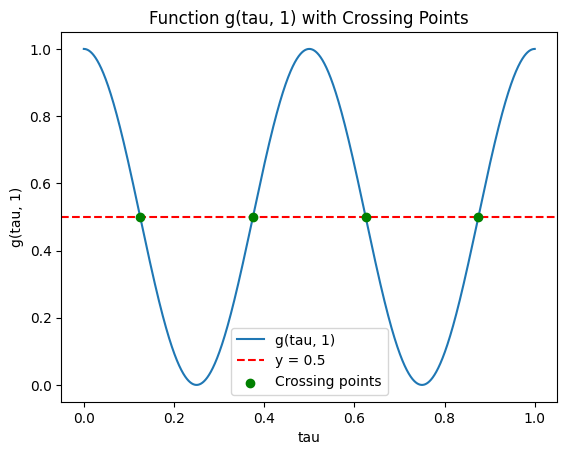

In [432]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(tau)
def g(tau, t):
    return (1 + np.cos(4 * np.pi * tau / t)) / 2

# Parameters
time_steps = 100000  # High time steps for better resolution
tau = np.linspace(0, 1, time_steps)  # Discretized tau values
target_value = 0.5  # Value we want to check for crossing

# Compute g(tau, 1) for the given tau values
g_tau = g(tau, 1)

# Find the sign changes between adjacent values
crossings = []

# Check for sign changes between consecutive elements in g(tau) - target_value
for n in range(len(g_tau) - 1):
    if (g_tau[n] < target_value and g_tau[n + 1] > target_value) or (g_tau[n] > target_value and g_tau[n + 1] < target_value):
        crossings.append(n)  # Save the index where crossing happens

# Output the number of crossings
print(f"Number of crossings where g(tau) crosses {target_value}: {len(crossings)}")

# Optionally, you can print the actual crossing indices or the values at those points
print(f"Indices of crossings: {crossings[:10]}...")  # Print the first few crossings

# Plot g(tau) and highlight the crossing points
plt.plot(tau, g_tau, label='g(tau, 1)')
plt.axhline(y=target_value, color='r', linestyle='--', label=f'y = {target_value}')  # Horizontal line at target_value
plt.scatter(tau[crossings], g_tau[crossings], color='g', label='Crossing points', zorder=5)
plt.title('Function g(tau, 1) with Crossing Points')
plt.xlabel('tau')
plt.ylabel('g(tau, 1)')
plt.legend()
plt.show()


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
4.0


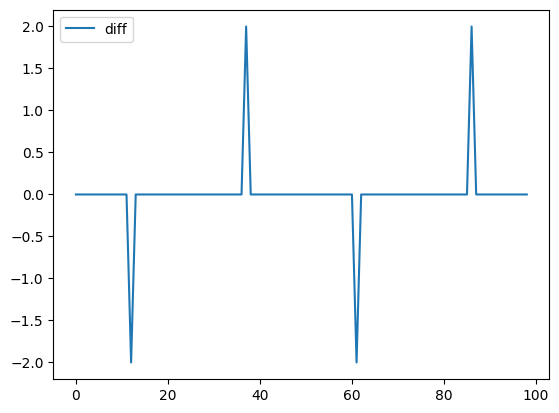

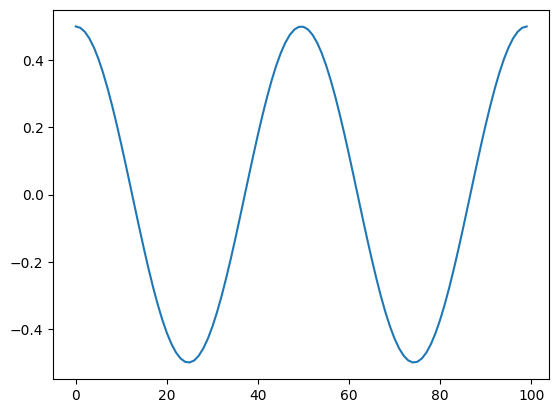

Estimated number of sign changes: 49.5


In [433]:
import numpy as np
import matplotlib.pyplot as plt

def g(tau, t):
    return (1 + np.cos(4 * np.pi * tau / t)) / 2

def smooth_sign_change_detection(g_tau, alpha=100):
    """
    Detects the sign changes in an array with a smooth approximation using a sigmoid function.
    The function returns a smooth approximation of the sign changes.
    
    Args:
        arr (numpy.ndarray): Input array.
        alpha (float): Sharpness of the transition (larger alpha = sharper transition).
    
    Returns:
        float: Estimated number of sign changes.
    """
    # Compute the difference between consecutive elements
    eps = 0
    x = 0.5
    arr = g_tau - x
    #normal_1 = 1 / (1 + np.exp(-arr))
    normalized = arr / (eps + np.abs(arr))
    print(normalized)
    #print(arr)
    diff = np.diff(normalized)
    print(np.abs(diff).sum() / 2)
    #second_diff = np.diff(diff)
    #print(diff)
    #print((diff > 1e-1).sum())
    #plt.plot(arr, label = 'func')
    #plt.plot(diff, label = 'diff')
    plt.plot(diff, label = 'diff')
    plt.legend()
    plt.show()
    
    # Apply a smooth sigmoid function to detect sign changes
    smooth_sign_changes = 1 / (1 + np.exp(-alpha * diff))
    
    # Count the number of smooth transitions (i.e., sign changes)
    estimated_sign_changes = smooth_sign_changes.sum()
    
    return estimated_sign_changes
time_steps = 100  # High time steps for better resolution
tau = np.linspace(0, 1, time_steps)  # Discretized tau values
estimated_changes = smooth_sign_change_detection(g_tau = g(tau, 1), alpha=100)
plt.plot(g(tau, 1) - 0.5)
plt.show()
# Output the estimated number of sign changes
print(f"Estimated number of sign changes: {estimated_changes}")

# Plot the smooth detection
#diff = np.diff(arr)
#smooth_changes = 1 / (1 + np.exp(-100 * diff))  # Apply the smooth transition

#plt.plot(smooth_changes)
#plt.title("Smooth Detection of Sign Changes")
#plt.xlabel("Index")
#plt.ylabel("Smoothed Sign Change")
#plt.show()


In [434]:
X = torch.randn(10,16,4)
arr = (X - 0.5)
arr /= arr.abs()

0.15000000000000002 amp
0.75 vert
0.15 amp
0.15 vert


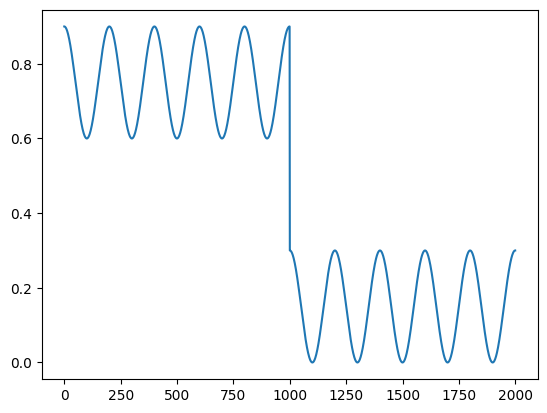

In [435]:
def generate_cosine_wave(start, end, length, frequency):
    # Create a linspace for the x values (0 to 2*pi for one cycle of the cosine wave)
    x = torch.linspace(0, 1, length)
    
    # Amplitude is half the range (difference between start and end divided by 2)
    amplitude = (end - start) / 2
    
    # Vertical shift is the midpoint between start and end
    vertical_shift = (start + end) / 2
    print(amplitude,"amp")
    print(vertical_shift, "vert")
    
    # Create the cosine wave
    cosine_wave = amplitude * torch.cos(frequency * x) + vertical_shift
    
    return cosine_wave

# Parameters
frequency =  10 * np.pi  # Frequency of the cosine wave (adjust as needed)
length = 1000  # Length of each section (50 elements)
start_1, end_1 = 0.6, 0.9  # Range for the first part
start_2, end_2 = 0.0, 0.3  # Range for the second part

# Generate the two parts of the cosine wave
cos_wave_1 = generate_cosine_wave(start_1, end_1, length, frequency)
cos_wave_2 = generate_cosine_wave(start_2, end_2, length, frequency)

# Concatenate both parts to form the final tensor
cosine = np.hstack([cos_wave_1,cos_wave_2])
plt.plot(cosine)
plt.show()
print()

In [436]:
print(cosine)

[0.9        0.8999258  0.89970344 ... 0.29970342 0.29992586 0.3       ]


In [437]:
def rejection_sampling(pdf, in_dim, n_samples, L, max_pdf_value=1.0):
    """
    Rejection sampling to draw samples from a given PDF.
    
    Parameters:
    - pdf: The custom PDF function.
    - n_samples: Number of samples to generate.
    - x_range: Range of x values to sample from.
    - max_pdf_value: The maximum value of the PDF to normalize the proposal distribution.
    
    Returns:
    - samples: List of samples drawn from the PDF.
    """
    samples = []
    while len(samples) < n_samples:
        # Generate random candidate sample from the proposal distribution (uniform)
        x_candidate = np.array([np.random.uniform(0, upper, size=(1)) for upper in L]).T
        y_candidate = np.random.uniform(0, max_pdf_value)
        
        # Accept the sample with probability proportional to the PDF value
        if y_candidate < pdf(x_candidate):
            samples.append(x_candidate)
    return torch.tensor(np.array(samples))

In [438]:
def rejection_sampling(pdf, n_samples, x_range = (1e-2,1 - 1e-2), max_pdf = 11):
    # Assuming the pdf is normalized so that it integrates to 1 over the range
    samples = []
    gen_samples = 0
    while gen_samples < n_samples:
        # Sample x_candidate from the range
        x_candidate = torch.rand(1) * (x_range[1] - x_range[0]) + x_range[0]
        
        # Sample y_candidate from a uniform distribution between 0 and 1
        y_candidate = torch.rand(1) * max_pdf
        
        # Compute the probability of acceptance as a soft threshold
        acceptance_probability = torch.sigmoid(pdf(x_candidate) - y_candidate)  # smooth function to decide acceptance
        try:
            accept = torch.bernoulli(acceptance_probability)
        except:
            print(x_candidate)
            ## sometimes pdf generates division by 0 error --> nan
            continue
        
        # Only append x_candidate if accepted, but using a differentiable approximation
        if accept.item(): 
            sample = x_candidate * accept
            #print(accept, x_candidate)
            samples.append(sample)
            gen_samples += 1
    
    return torch.cat(samples)

In [439]:
time_steps = 1000
tau = np.linspace(0, 1, time_steps)
g_tau = g(tau, 1)
arr1 = torch.tensor(g_tau, requires_grad=True)
eps = 0
x = 0.5
def C_t(x):
    """
        C_t in one dimension 
        TODO VECTTORIZE
    """
    X = torch.tensor(cosine, requires_grad=True).unsqueeze(1).unsqueeze(1).unsqueeze(1)
    eps = 1e-6
    arr = X - x
    normalized = arr / (arr.abs())
    diff = torch.diff(normalized, dim = 0)
    return diff.abs().sum(dim=(0,2)) / 2 

#[Num_timesteps ,Batch_size, N_Agents, in_dim] 
X = torch.tensor(cosine, requires_grad=False).unsqueeze(1).unsqueeze(1).unsqueeze(1) ### previously predicted values
#X = X.repeat(1, 4, 1, 1)

#X = torch.randn(10,16,4,1)
print(X.shape)
n_steps = 1000
xs = torch.linspace(1e-2,1 - 1e-2,n_steps)
C_x = torch.zeros(1, n_steps)
for i in range(n_steps):
    C_x[:,i] = C_t(xs[i]).squeeze()
    #print(C_t(0.5, X))
    #break
print(C_x.max())
C_x = C_x / C_x.mean()
k_max = 12
torch.fft.fft(C_x, norm='forward', dim = 1)[:,:].real * 2**(0.5)



torch.Size([2000, 1, 1, 1])
tensor(11., grad_fn=<MaxBackward1>)


tensor([[ 1.4142e+00,  2.9122e-01, -4.1523e-01, -8.1572e-02, -4.4722e-02,
         -1.0954e-02,  7.5467e-03,  1.4924e-02,  1.1569e-01, -1.1003e-02,
          6.3000e-03,  4.5739e-02, -5.3744e-02, -2.2450e-02, -1.9547e-02,
         -9.9097e-03, -5.8651e-03, -6.3605e-03,  5.1035e-02,  2.3429e-03,
          4.8069e-03,  3.3238e-02, -1.8077e-02, -1.0593e-02, -1.2807e-02,
         -7.9735e-03, -7.7313e-03, -1.3239e-02,  2.9183e-02,  4.2809e-03,
          2.5658e-03,  2.7064e-02, -4.0406e-03, -3.5228e-03, -8.0373e-03,
         -5.4272e-03, -6.7431e-03, -1.6211e-02,  1.6984e-02,  3.6133e-03,
         -9.3355e-05,  2.1881e-02,  2.7538e-03,  1.3875e-03, -4.1109e-03,
         -2.6356e-03, -4.2842e-03, -1.6848e-02,  9.1507e-03,  2.2687e-03,
         -2.7853e-03,  1.6826e-02,  5.7177e-03,  4.6362e-03, -9.8468e-04,
          9.9927e-06, -1.0501e-03, -1.5775e-02,  4.1056e-03,  1.0522e-03,
         -5.1292e-03,  1.1900e-02,  6.2626e-03,  6.4127e-03,  1.2378e-03,
          2.1535e-03,  2.4021e-03, -1.

In [440]:
signal = torch.ones(1000)
print(torch.fft.fft(signal))

tensor([ 1.0000e+03+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         3.7688e-06-2.3918e-06j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
         0.000

In [441]:
k_max = 64
L = torch.tensor([1.])
n_samples = 1000
samples = rejection_sampling(C_t, n_samples)


In [442]:
samples.shape

torch.Size([1000, 1])

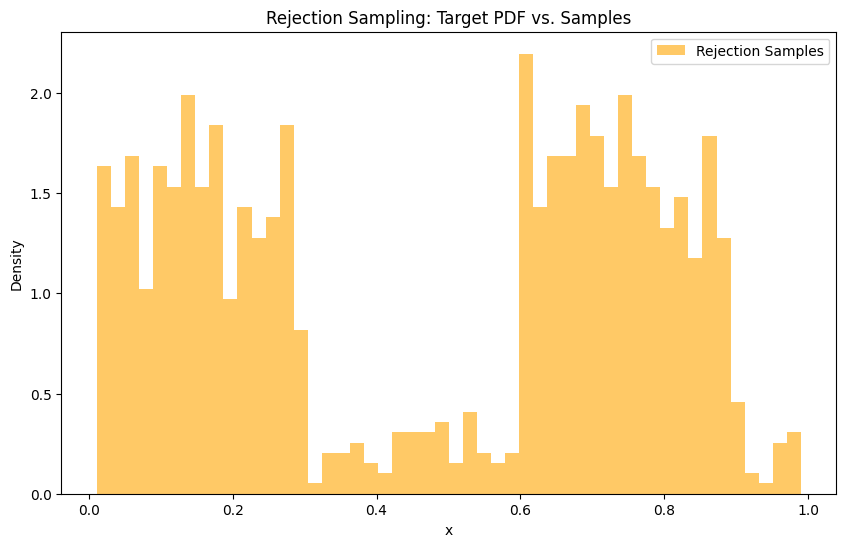

In [443]:
#x_values = torch.linspace(0, 1, n_samples)
#target_values = target_pdf(x_values)
plt.figure(figsize=(10, 6))
#plt.plot(x_values.numpy(), target_values.numpy(), label='Target PDF (Normal Distribution)', color='blue', lw=2)
plt.hist(samples.detach().numpy(), bins=50, density=True, alpha=0.6, label='Rejection Samples', color='orange')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling: Target PDF vs. Samples')
plt.legend()
plt.show()

In [444]:
from itertools import product
coeff_shape = [k_max for _ in range(len(L))]
coeffs_density = torch.zeros(coeff_shape)
k = list(range(k_max))
for sets in product(k, repeat = len(L)):
    k = torch.tensor(sets, dtype = torch.float32)
    k *= torch.pi * (L)**(-1)
    coeffs_density[sets] = torch.cos(samples * k).prod(dim = 1).sum() / n_samples

In [445]:
coeffs_density * 2**(0.5)

tensor([ 1.4142e+00,  5.6947e-02,  2.0567e-01,  3.9440e-01, -3.9667e-01,
        -3.5049e-02, -6.2016e-02, -3.4452e-02, -3.9771e-02,  1.0777e-01,
        -1.5354e-02, -1.3495e-01,  1.2916e-02, -1.4255e-02,  3.4733e-02,
        -1.1081e-02,  1.1890e-01, -5.7399e-02, -8.5766e-02, -5.8117e-02,
        -7.1480e-02, -3.4320e-02, -2.9331e-02,  6.9067e-02, -6.8802e-02,
        -3.5615e-02,  4.1538e-03, -4.1656e-03, -5.9009e-02,  4.9759e-02,
         2.7787e-02, -8.7366e-02,  1.8843e-02,  1.1019e-02, -3.7954e-02,
         1.2827e-02,  3.1614e-02, -1.2726e-02, -4.1447e-02, -2.0719e-02,
        -5.5592e-02, -4.8261e-02,  2.8795e-02,  2.3189e-02,  5.4857e-03,
         4.2565e-02,  4.2044e-02, -1.7944e-02, -6.4321e-02, -4.8375e-02,
        -6.3864e-02, -1.0214e-01, -3.6893e-02,  1.6963e-02, -5.5792e-02,
        -1.0399e-03,  3.1924e-02, -5.5030e-02, -1.8118e-02,  2.8707e-02,
        -5.9331e-03,  1.7866e-02,  2.0229e-02,  2.1510e-02],
       grad_fn=<MulBackward0>)